## [stable_baselines3 docs for PPO](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html)

## [docs for configuring our custom environment to work with stable_baselines3](https://stable-baselines.readthedocs.io/en/master/guide/custom_env.html)

In [67]:
import numpy as np
import gym
from gym import spaces

#from environment_gym import HumanArmImitation
# just including full class definition below so you can tweak it as needed


In [68]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.cmd_util import make_vec_env

In [69]:
env = HumanArmImitation('c2fixc')
# If the environment don't follow the interface, an error will be thrown
check_env(env, warn=False)

# wrap the env - I had some issues with this so just commented it out
#env = make_vec_env(lambda: env, n_envs=1)

In [70]:
env = HumanArmImitation('c2fixc')
obs = env.reset()
n_steps = 10
for _ in range(n_steps):
    # Random action
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    print(f"reward: {reward}")
    if done:
        obs = env.reset()

reward: -0.0012571818622429715
reward: -0.0013330085376844726
reward: -0.0016871764888885905
reward: -0.0014729868497546158
reward: -0.001643803357654325
reward: -0.003878811321306559
reward: -0.0015602186823250378
reward: -0.002531692597345575
reward: -0.0027909537744073933
reward: -0.002597906064435678


In [12]:
# Train the agent - should take a while
model = PPO('MlpPolicy', env, verbose=1).learn(5000)

# Test the trained agent
obs = env.reset()
n_steps = 20
for step in range(n_steps):
    action, _ = model.predict(obs, deterministic=True)
    print("Step {}".format(step + 1))
    print("Action: ", action)
    obs, reward, done, info = env.step(action)
    print('obs=', obs, 'reward=', reward, 'done=', done)
    env.render(mode='console')
    if done:
        # Note that the VecEnv resets automatically
        # when a done signal is encountered
        print("Goal reached!", "reward=", reward)
        break

Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 92       |
|    ep_rew_mean     | -0.722   |
| time/              |          |
|    fps             | 12       |
|    iterations      | 1        |
|    time_elapsed    | 158      |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 92          |
|    ep_rew_mean          | -0.722      |
| time/                   |             |
|    fps                  | 12          |
|    iterations           | 2           |
|    time_elapsed         | 322         |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.004840106 |
|    clip_fraction        | 0.0608      |
|    clip_range           | 0.2         |
|    entropy_loss         | -8.51       |
|    explained_variance   | -0.2        |
|    learning

obs= [[[[ 2.6918726  -2.217481   -0.24785009  0.55898243 -1.926799
     0.08967818]
   [-0.05790417  0.05316704 -0.03378631 -0.03272075  0.01229237
    -0.02762229]]

  [[ 2.6779451  -2.2142975  -0.21405321  0.6975034  -2.0325189
     0.09931857]
   [ 0.06112607  0.01557405 -0.12896018  0.05368697  0.10342265
    -0.22417372]]]] reward= [-0.00262891] done= [False]
Step 16
Action:  [[-0.02793438 -0.0057691   0.06169784 -0.01189913 -0.00858369  0.07908122]]
obs= [[[[ 2.6918614  -2.220382   -0.24488623  0.55901283 -1.9264548
     0.09178511]
   [ 0.00342864  0.10563263 -0.15059683 -0.10196549  0.1443088
    -0.21654849]]

  [[ 2.6779451  -2.2142975  -0.21405321  0.6975034  -2.0325189
     0.09931857]
   [ 0.06112607  0.01557405 -0.12896018  0.05368697  0.10342265
    -0.22417372]]]] reward= [-0.00207282] done= [False]
Step 17
Action:  [[-0.0229382  -0.00566187  0.0536451  -0.00288496 -0.00975431  0.07260323]]
obs= [[[[ 2.693901   -2.216702   -0.23744677  0.5103986  -1.8975692
     0.08350

In [71]:
# Test the trained agent
rews = []
states = []
tot_rew = 0
obs = env.reset()
n_eps = 10
for step in range(n_eps):
    action, _ = model.predict(obs, deterministic=True)
    #print("Step {}".format(step + 1))
    #print("Action: ", action)
    obs, reward, done, info = env.step(action)
    #states.append(obs)
    #tot_rew+=reward
    rews.append(reward)
    #print('obs=', obs, 'reward=', reward, 'done=', done)
    env.render(mode='console')
    if done:
        # Note that the VecEnv resets automatically
        # when a done signal is encountered
        print("Goal reached!", "reward=", reward)
        #break

In [38]:
import matplotlib.pyplot as plt

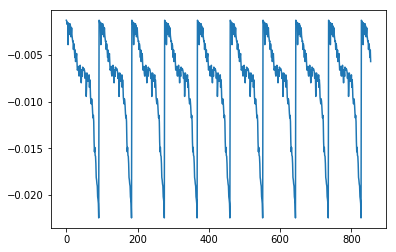

In [66]:
plt.plot(rews)